 1. Data Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("Titanic_train.csv")

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Summary of dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Check for missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

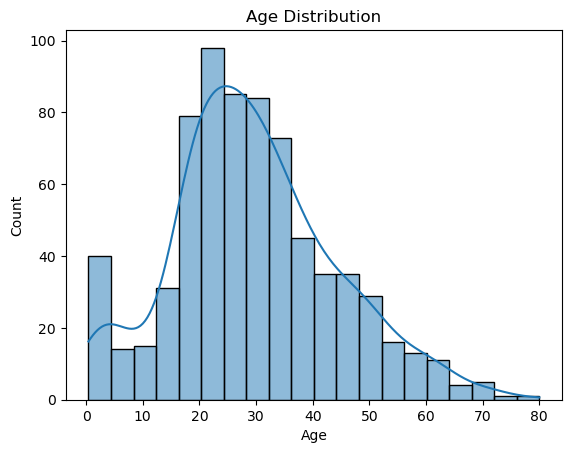

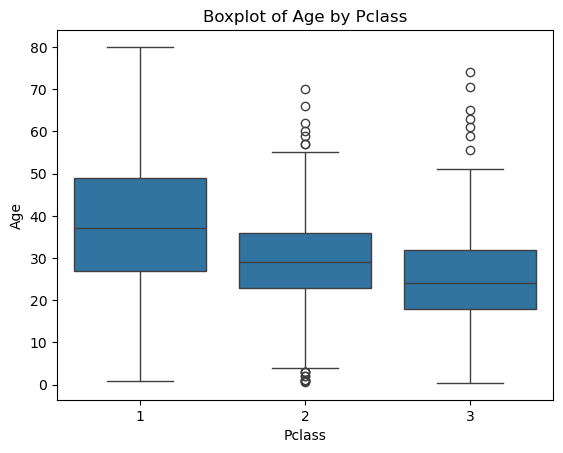

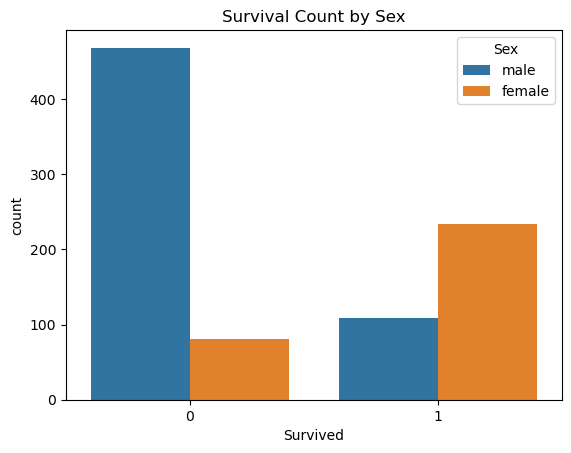

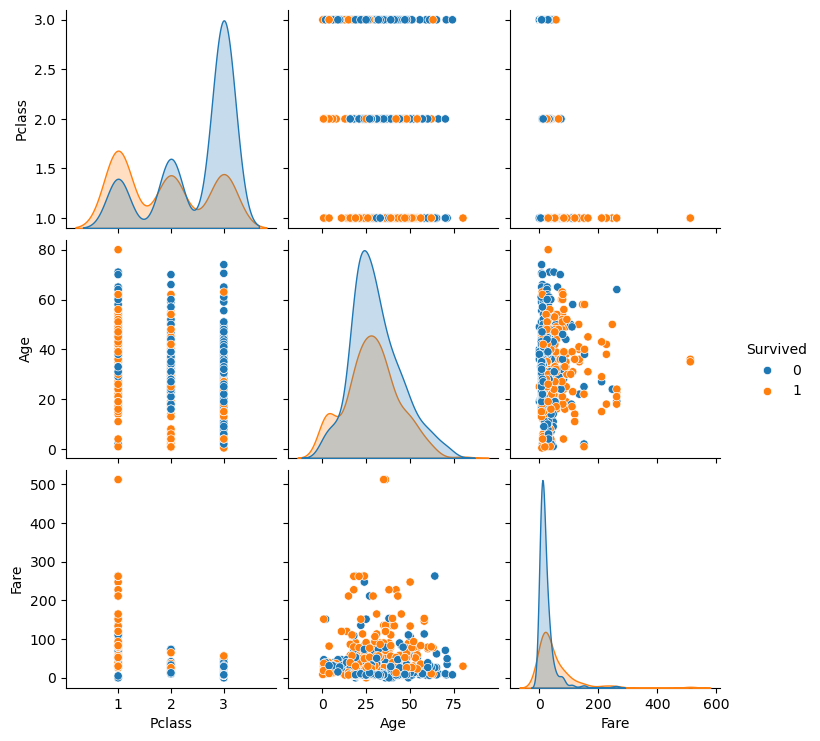

In [4]:
# Visualizations
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Boxplot of Age by Pclass')
plt.show()

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']].dropna(), hue='Survived')
plt.show()


2. Data Preprocessing

In [6]:
# Avoiding chained assignment warnings

# Fill missing Age values with median
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [7]:
df.fillna({
    'Age': df['Age'].median(),
    'Embarked': df['Embarked'].mode()[0]
}, inplace=True)


In [8]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# View processed data
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


3. Model Building

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

 4. Model Evaluation

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC Score: 0.8824967824967825


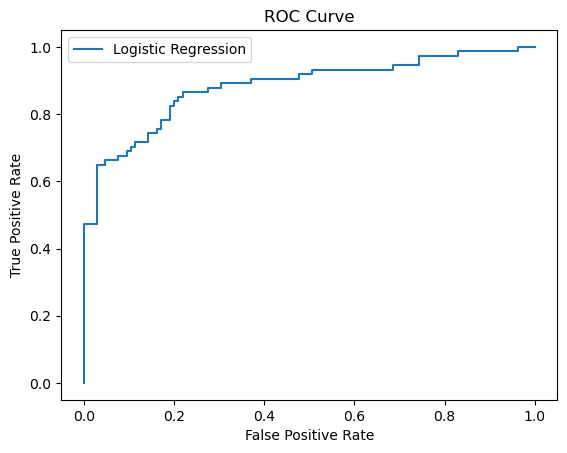

In [11]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


5. Interpretation

In [12]:
# Coefficients
coeff_df = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)


,Coefficient
Fare,0.002592
Age,-0.030494
Parch,-0.108488
Embarked_Q,-0.111237
SibSp,-0.294911
Embarked_S,-0.398404
Pclass,-0.937033
Sex_male,-2.593063


6. Deployment with Streamlit

In [15]:
import streamlit as st
import pickle
import pandas as pd

# Load the trained model
model = pickle.load(open('logistic_model.pkl', 'rb'))

st.title("Titanic Survival Prediction")

Pclass = st.selectbox("Passenger Class", [1, 2, 3])
Age = st.slider("Age", 0, 100, 25)
SibSp = st.number_input("Siblings/Spouses Aboard", 0, 10)
Parch = st.number_input("Parents/Children Aboard", 0, 10)
Fare = st.number_input("Fare", 0.0, 500.0, step=0.1)
Sex_male = st.selectbox("Gender", ['Female', 'Male']) == 'Male'
Embarked_Q = st.checkbox("Embarked from Q?")
Embarked_S = st.checkbox("Embarked from S?")

# Prepare input
input_data = pd.DataFrame({
    'Pclass': [Pclass],
    'Age': [Age],
    'SibSp': [SibSp],
    'Parch': [Parch],
    'Fare': [Fare],
    'Sex_male': [Sex_male],
    'Embarked_Q': [Embarked_Q],
    'Embarked_S': [Embarked_S]
})

# Predict
if st.button("Predict"):
    prediction = model.predict(input_data)[0]
    st.success(f"Survival Prediction: {'Survived' if prediction == 1 else 'Did Not Survive'}")


2025-04-08 20:17:49.159 
  command:

    streamlit run C:\Users\sschp\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [14]:
import pickle
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)


1. What is the difference between precision and recall?

Precision and Recall are evaluation metrics used for classification tasks, especially in imbalanced datasets.
Precision answers:
Out of all the predicted positives, how many were actually positive?

Precision=True Positives/True Positives + False Positives
High precision means few false positives.

Recall answers:Out of all the actual positives, how many did we correctly predict?

Recall=True Positives/True Positives + False Negatives
High recall means few false negatives.

Example:
In spam detection:
High precision: Only true spam is caught, but we might miss some.
High recall: We catch almost all spam, but some non-spam emails might be wrongly flagged.



2. What is cross-validation, and why is it important in binary classification?
   
Cross-validation is a technique to evaluate the performance of a machine learning model by splitting the dataset into multiple folds (typically 5 or 10), training the model on some folds, and testing on the remaining fold.

🔁 How it works (for K-Fold CV):
Split the dataset into K equal parts.
Train the model on K-1 parts.
test it on the remaining 1 part.
Repeat K times (each time using a different part as the test set).
Average the performance metrics across all folds.

Why it matters:
Gives a more reliable estimate of model performance than a single train-test split.
Helps detect overfitting.
Ensures the model performs well across different subsets of data.
Especially in binary classification, where class imbalance may be present, cross-validation gives a more robust and fair evaluation.